In [1]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn import tree

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('after_data_handling.csv' )

In [3]:
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)

In [4]:
df.isnull().sum()

Name              0
Year              0
Mileage           0
Count Raiting     0
Rating            0
Fuel type         0
Interior color    0
Exterior_color    0
Price             0
bind_price        0
dtype: int64

In [5]:
df.describe(include = 'all')

,Name,Year,Mileage,Count Raiting,Rating,Fuel type,Interior color,Exterior_color,Price,bind_price
count,7475,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475,7475,7475.000000,7475.000000
unique,30,NaN,NaN,NaN,NaN,NaN,59,238,NaN,NaN
top,Volkswagen Jetta 1.4T S,NaN,NaN,NaN,NaN,NaN,Black,Black,NaN,NaN
freq,1326,NaN,NaN,NaN,NaN,NaN,3084,842,NaN,NaN
mean,NaN,2017.750368,49318.761204,1263.481070,4.343264,0.153579,NaN,NaN,24324.852575,4.770167
std,NaN,3.023372,37186.897759,2648.186075,0.688194,0.360568,NaN,NaN,13789.526313,1.711815
min,NaN,2000.000000,0.000000,1.000000,1.000000,0.000000,NaN,NaN,1900.000000,1.000000
25%,NaN,2017.000000,21534.500000,54.000000,4.200000,0.000000,NaN,NaN,16912.500000,4.000000
50%,NaN,2019.000000,39216.000000,339.000000,4.600000,0.000000,NaN,NaN,20979.000000,5.000000
75%,NaN,2020.000000,67600.500000,1143.000000,4.800000,0.000000,NaN,NaN,25413.500000,6.000000


In [6]:
numeric_Cars= df.copy()

In [7]:
numeric_Cars['Name'] = LabelEncoder().fit_transform(numeric_Cars['Name'])
numeric_Cars['Interior color'] = LabelEncoder().fit_transform(numeric_Cars['Interior color'])
numeric_Cars['Exterior_color'] = LabelEncoder().fit_transform(numeric_Cars['Exterior_color'])
numeric_Cars['Year'] = LabelEncoder().fit_transform(numeric_Cars['Year'])

In [8]:
numeric_Cars


,Name,Year,Mileage,Count Raiting,Rating,Fuel type,Interior color,Exterior_color,Price,bind_price
0,24,19,47644.0,1632.0,4.8,0,12,201,19991.0,4
1,24,18,38971.0,272.0,4.6,0,5,171,18700.0,4
2,24,18,73147.0,245.0,3.4,0,12,214,14800.0,3
3,24,15,88010.0,929.0,4.7,0,5,63,15985.0,4
4,24,18,47680.0,1032.0,4.7,0,5,213,20000.0,4
...,...,...,...,...,...,...,...,...,...,...
7470,20,19,23490.0,1063.0,4.6,1,56,30,53990.0,8
7471,20,20,11122.0,29.0,4.6,1,12,100,60900.0,9
7472,22,19,34396.0,11.0,2.2,1,41,230,58999.0,8
7473,20,19,22720.0,130.0,4.2,1,12,151,53997.0,8


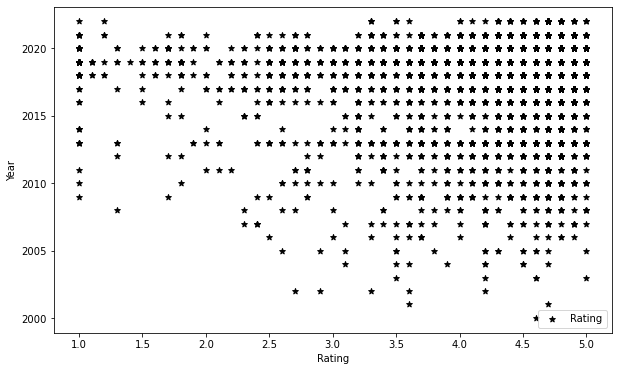

In [9]:
plt.scatter(x= df['Rating'],y=df['Year'],c='k',marker='*',label='Rating')
plt.legend(numpoints=1,loc=4)
plt.xlabel('Rating')
plt.ylabel('Year')
plt.show()

In [10]:
df["hasatleast3.5Rate"]= df["Rating"]>=3.5
df

,Name,Year,Mileage,Count Raiting,Rating,Fuel type,Interior color,Exterior_color,Price,bind_price,hasatleast3.5Rate
0,Toyota Corolla LE,2019,47644.0,1632.0,4.8,0,Black,Slate Metallic,19991.0,4,True
1,Toyota Corolla LE,2018,38971.0,272.0,4.6,0,Ash,Red,18700.0,4,True
2,Toyota Corolla LE,2018,73147.0,245.0,3.4,0,Black,Tan,14800.0,3,False
3,Toyota Corolla LE,2015,88010.0,929.0,4.7,0,Ash,Classic Silver Metallic,15985.0,4,True
4,Toyota Corolla LE,2018,47680.0,1032.0,4.7,0,Ash,Super White,20000.0,4,True
...,...,...,...,...,...,...,...,...,...,...,...
7470,Tesla Model 3 Long Range,2019,23490.0,1063.0,4.6,1,White / Black,Blue,53990.0,8,True
7471,Tesla Model 3 Long Range,2020,11122.0,29.0,4.6,1,Black,Gray,60900.0,9,True
7472,Tesla Model 3 Performance,2019,34396.0,11.0,2.2,1,Red,White,58999.0,8,False
7473,Tesla Model 3 Long Range,2019,22720.0,130.0,4.2,1,Black,Pearl White Multi,53997.0,8,True


In [14]:
isatleast3andahalfRate = df.drop({"Rating"},axis=1)
isatleast3andahalfRate

,Name,Year,Mileage,Count Raiting,Fuel type,Interior color,Exterior_color,Price,bind_price,hasatleast3.5Rate
0,Toyota Corolla LE,2019,47644.0,1632.0,0,Black,Slate Metallic,19991.0,4,True
1,Toyota Corolla LE,2018,38971.0,272.0,0,Ash,Red,18700.0,4,True
2,Toyota Corolla LE,2018,73147.0,245.0,0,Black,Tan,14800.0,3,False
3,Toyota Corolla LE,2015,88010.0,929.0,0,Ash,Classic Silver Metallic,15985.0,4,True
4,Toyota Corolla LE,2018,47680.0,1032.0,0,Ash,Super White,20000.0,4,True
...,...,...,...,...,...,...,...,...,...,...
7470,Tesla Model 3 Long Range,2019,23490.0,1063.0,1,White / Black,Blue,53990.0,8,True
7471,Tesla Model 3 Long Range,2020,11122.0,29.0,1,Black,Gray,60900.0,9,True
7472,Tesla Model 3 Performance,2019,34396.0,11.0,1,Red,White,58999.0,8,False
7473,Tesla Model 3 Long Range,2019,22720.0,130.0,1,Black,Pearl White Multi,53997.0,8,True


In [15]:
isatleast3andahalfRate.columns

Index(['Name', 'Year', 'Mileage', 'Count Raiting', 'Fuel type',
       'Interior color', 'Exterior_color', 'Price', 'bind_price',
       'hasatleast3.5Rate'],
      dtype='object')

In [16]:
isatleast3andahalfRate.drop(['Name', 'Interior color', 'Exterior_color'],axis = 1,inplace = True)

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(isatleast3andahalfRate.drop("hasatleast3.5Rate",axis = 1),isatleast3andahalfRate["hasatleast3.5Rate"],
                                             random_state = 0)

In [18]:
clf = LogisticRegression()
clf.fit(xtrain,ytrain)
accurcy = clf.score(xtest,ytest)
print(f"accurcy is {accurcy}")

accurcy is 0.918673087212413
